<i><b>Public AI</b></i>
<br>

# 풀링 연산이란

### _Objective_
1. CNN에서 이미지의 사이즈를 줄이는 방법인 Pooling 대해 배워 봅니다. <br>
2. Average Pooling 과 Max Pooling 에 대해 배워 봅니다. 
  


In [5]:
%matplotlib inline
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

# \[ 1. 풀링 연산이란 \]
---

풀링은 세로,가로 방향의 공간을 줄이는 연산입니다.

## 1. 2차원 데이터로 풀링 연산 수행하기

아래의 2차원 데이터를 통해, 풀링 연산이 어떤 식으로 진행되는지 살펴보도록 하겠습니다.



In [6]:
values = np.array([
    [1,3,2,1],
    [2,9,1,1],
    [1,3,2,3],
    [2,6,1,2]
])

### (1) Max 풀링 연산 수행하기

아래는 2x2 Max Pooling을 stride 2로 처리하는 결과입니다.<br> 
최대 풀링은 합성곱 연산와 같이, 특정 패치 단위로 입력값을 스캔하면서<br>
처리하게 됩니다. <br> Pooling filter 가 적용되는 window 에 가장 큰 값만을 추출합니다.

![Imgur](https://i.imgur.com/7VjIgyc.png)

In [7]:
values = np.array([
    [1,3,2,1],
    [2,9,1,1],
    [1,3,2,3],
    [2,6,1,2]
])

filters = 2
strides = 2
result = #FIXME : values에 대한 Max 풀링 연산의 결과를 넣어주세요
result

array([[9., 2.],
       [6., 3.]])

위와 같이 처리할 경우 2가지 장점이 생깁니다



1. 위치 불변성

    이렇게 될 경우, 이미지가 약간 이동하더라도 신경망이 영향을 덜 받게 됩니다. <br><br>
    이는 **위치 불변성(Location Invariance)** 이라는 이슈로,<br> 
    모델이 견고하게 되는데에 중요한 특성 중 하나입니다.

2. 연산량 줄임

    Pooling Layer은 이미지의 크기를 크게 줄이는 효과를 가져다 줍니다. 이미지의 크기에 따라 연산량은 증가하는데, Pooling Layer은 이미지를 축소하여, 중요한 것만 요약해주는 기능을 가집니다. 



### (2) Keras 로 Max 풀링 연산 수행하기

![Imgur](https://i.imgur.com/yvzRqwr.png)

In [8]:
res_values = values.reshape(1,4,4,1)
inputs = Input(shape=(4,4,1))
max_0 = MaxPooling2D(strides=2)(inputs)

model = Model(inputs, max_0)
model.predict(res_values)

array([[[[9.],
         [2.]],

        [[6.],
         [3.]]]], dtype=float32)

### (3) Average 풀링 연산 수행하기

![Imgur](https://i.imgur.com/CDEog86.png)

아래는 2x2 Average Pooling을 stride 2로 처리하는 결과입니다. <br>
Average Pooling 에서는 MaxPooling 과 달리 평균 값을 출력 합니다. 




In [9]:
values = np.array([
    [1,3,2,1],
    [2,9,1,1],
    [1,3,2,3],
    [2,6,1,2]
])

filters = 2
strides = 2
result = #FIXME : values에 대한 Max 풀링 연산의 결과를 넣어주세요
result

array([[3.75, 1.25],
       [3.  , 2.  ]])


### (4) Keras 로 Average 풀링 연산 수행하기
![Imgur](https://i.imgur.com/F0pUja8.png)

In [10]:
res_values = values.reshape(1,4,4,1)
inputs = Input(shape=(4,4,1))
max_0 = AveragePooling2D(strides=2)(inputs)

model = Model(inputs, max_0)
model.predict(res_values)

array([[[[3.75],
         [1.25]],

        [[3.  ],
         [2.  ]]]], dtype=float32)

## 2. 3차원 데이터로 풀링 연산 수행하기

합성곱 연산과 마찬가지로, 각 채널 별로 독립적으로 풀링 연산이 수행되게 됩니다.<br>

![Imgur](https://i.imgur.com/LgbK2BY.png)

### (1) 3차원 데이터 구성하기

In [11]:
in0 = np.array([
    [1,4,2,0],
    [2,3,1,0],
    [3,1,2,3],
    [4,3,2,1]
])
in1 = np.array([
    [1,7,2,1],
    [3,2,1,9],
    [0,1,5,1],
    [4,6,2,4]
])
in2 = np.array([
    [1,5,2,1],
    [3,2,1,9],
    [0,1,3,1],
    [4,6,2,7]
])
values = np.stack([in0, in1, in2],axis=-1)
print("입력값의 형태 (H, W, C) :({},{},{})".format(*values.shape))

입력값의 형태 (H, W, C) :(4,4,3)


In [12]:
filters = 2
strides = 2
result = np.zeros([2,2,3])
for i in range(0,values.shape[0],strides):
    for j in range(0,values.shape[1],strides):
        for k in range(0,values.shape[2]):
            patch = values[i:i+filters,j:j+strides,k]
            result[i//2,j//2,k] = np.max(patch)

print("출력값의 형태 (H, W, C) :({},{},{})".format(*result.shape))
result

출력값의 형태 (H, W, C) :(2,2,3)


array([[[4., 7., 5.],
        [2., 9., 9.]],

       [[4., 6., 6.],
        [3., 5., 7.]]])

합성곱 신경망에서는 풀링 층을 사용해 표현의 크기를 줄임으로써 
1. 계산 속도를 줄이고,
2. 메모리의 사용량을 줄이며,
3. 특징을 좀 더 안정적으로 검출할 수 있도록 합니다.<br>


### (2) Keras 로 Max 풀링 연산 수행하기

In [13]:
res_values = values.reshape(1,4,4,3)
inputs = Input(shape=(4,4,3))
max_0 = MaxPooling2D(strides=2)(inputs)

model = Model(inputs, max_0)
model.predict(res_values)

array([[[[4., 7., 5.],
         [2., 9., 9.]],

        [[4., 6., 6.],
         [3., 5., 7.]]]], dtype=float32)

### (3) Keras 로 Average 풀링 연산 수행하기

In [14]:
res_values = values.reshape(1,4,4,3)
inputs = Input(shape=(4,4,3))
max_0 = AveragePooling2D(strides=2)(inputs)

model = Model(inputs, max_0)
model.predict(res_values)

array([[[[2.5 , 3.25, 2.75],
         [0.75, 3.25, 3.25]],

        [[2.75, 2.75, 2.75],
         [2.  , 3.  , 3.25]]]], dtype=float32)

## 3. Max pooling 과 Average Pooling  의 차이 

---

* Max Pooling 은 window 중 큰 값을 추출 합니다. 그렇기 때문에 값의 평준화가 일어납니다. 
* Average Pooling 은 값의 높낮이가 일정 이상 유지 됩니다. 



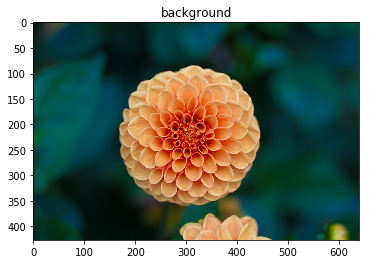

In [15]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()    
first_img_data = dataset.images[1] 

plt.imshow(first_img_data)
plt.title('background')
plt.show()

(1, 213, 320, 3)


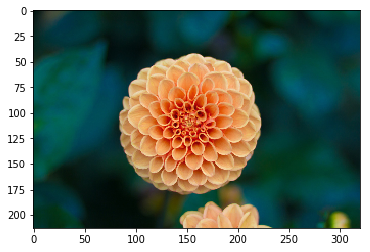

In [16]:
res_first_img_data = np.expand_dims(first_img_data, axis=0)
inputs = Input(shape=(427, 640 ,3))
max_0 = MaxPooling2D(strides=2)(inputs)

model = Model(inputs, max_0)
mxpl_img = model.predict(res_first_img_data)
print(mxpl_img.shape)
plt.imshow(mxpl_img[0]/255.)

(1, 209, 316, 3)


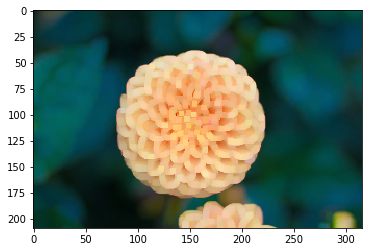

In [17]:
res_first_img_data = np.expand_dims(first_img_data, axis=0)
inputs = Input(shape=(427, 640 ,3))
max_0 = MaxPooling2D(10, strides=2)(inputs)

model = Model(inputs, max_0)
mxpl_img = model.predict(res_first_img_data)
print(mxpl_img.shape)
plt.imshow(mxpl_img[0]/255.)

(1, 209, 316, 3)


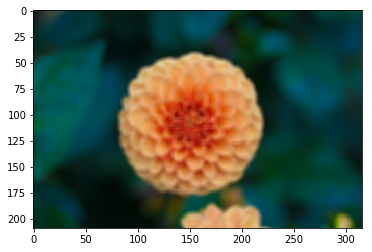

In [18]:
res_first_img_data = np.expand_dims(first_img_data, axis=0)
inputs = Input(shape=(427, 640 ,3))
max_0 = AveragePooling2D(10, strides=2)(inputs)

model = Model(inputs, max_0)
mxpl_img = model.predict(res_first_img_data)
print(mxpl_img.shape)
plt.imshow(mxpl_img[0]/255.)

---
⊙ Copyright(c) 2020 by PublicAI. All rights reserved <br>
All pictures, codes, writings cannot be copied without permission. <br>
Writen by PAI(info@publicai.co.kr) <br>
last updated on 2020/01/4 <br>

---